<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EC%88%98%EC%8B%9C%EC%9B%90%EC%84%9C%EC%A0%91%EC%88%98%EC%9D%B4%ED%9B%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 실행하고 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}merged_data.csv', encoding = 'cp949')

df.head(1)

In [ ]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
#이름으로 조회

import pandas as pd

# 이름으로 6모 모의고사 열람
name = input("이름:")
df_name = df[df.이름 == name]
df_name = df_name[['이름', '지역', '대학', '모집단위', '전형명', '지원시기',   '전형분류', '계열',  '전형종류', '전형일자',
                   '1단계발표일', '최종발표일', '최저학력기준', '전과목']]


# Define the table headers
table_headers = ['이름', '지역', '대학', '모집단위', '전형명', '지원시기',   '전형분류', '계열',  '전형종류', '전형일자',
                   '1단계발표일', '최종발표일', '최저학력기준', '전과목']

# Create the formatted table using tabulate
table_string = tabulate(df_name, headers=table_headers, tablefmt='plain')

print("**********************************************")
print(table_string)

In [ ]:
#대학으로 조회

import pandas as pd
from tabulate import tabulate

# Input for 대학
uni = input("대학:")

# Check for NaN values in '전형종류' column and then apply str.contains()
mask = df['대학'].notna() & df['대학'].str.contains(uni, na=False)

# Apply the mask to filter the DataFrame
df_subset = df[mask].copy()

#전과목을 소수첫째자리까지 표시
df_subset.loc[:, '전과목'] = df_subset['전과목'].round(1)


# Define the table headers
table_headers = ['이름', '지역', '대학', '모집단위', '전형명', '지원시기', '전형분류', '계열', '전형종류', '전형일자',
                   '1단계발표일', '최종발표일', '최저학력기준', '전과목']

# Create the formatted table using tabulate
table_string = tabulate(df_subset[table_headers], headers=table_headers, tablefmt='plain')

print("*************************************************************************************************************************************************")
print(table_string)


In [ ]:
#합격자 조회에 필요한 이름, 수험번호, 생년월일 찾기

import pandas as pd
from tabulate import tabulate


name = input("이름:")

# 이름으로 필터링
df_name = df[df.이름 == name]

# 중복 '모집단위' 제거
df_name = df_name.drop_duplicates('모집단위')

# '생년월일' 열 수정: 왼쪽에서 세 번째 숫자부터 선택, 점 제거
df_name['생년월일'] = df_name['생년월일'].apply(lambda x: x[2:].replace('.', ''))

# 필요한 열 선택
df_name = df_name[['이름', '수험번호', '생년월일', '대학', '모집단위', '1단계발표일', '최종발표일', '최저학력기준',  '전형분류']]

# 테이블 헤더 정의
table_headers = ['이름', '수험번호', '생년월일', '대학', '모집단위', '1단계발표일', '최종발표일', '최저학력기준',  '전형분류']

# tabulate를 사용하여 형식화된 테이블 생성
table_string = tabulate(df_name, headers=table_headers, tablefmt='plain')

print("****************************************************************************************************************************")
print(table_string)


In [ ]:
#dataset의 type 확인
type(df)

In [ ]:
#전형분류로 검색

import pandas as pd
from tabulate import tabulate

# Input for 전형종류
type = input("전형종류:")

# Check for NaN values in '전형종류' column and then apply str.contains()
mask = df['전형종류'].notna() & df['전형종류'].str.contains(type, na=False)

# Apply the mask to filter the DataFrame and create a copy
df_subset = df[mask].copy()

# Round the values in the '전과목' column to one decimal place using .loc
df_subset.loc[:, '전과목'] = df_subset['전과목'].round(1)

# Define the table headers
table_headers = ['이름', '지역', '대학', '모집단위', '전형명', '지원시기', '전형분류', '계열', '전형종류', '전형일자',
                   '1단계발표일', '최종발표일', '최저학력기준', '전과목']

# Create the formatted table using tabulate
table_string = tabulate(df_subset[table_headers], headers=table_headers, tablefmt='plain')

print("********************************************************************************************************************")
print(table_string)

In [ ]:
#1. 진학상담 사전양해 메모지

from pytz import timezone
from datetime import datetime

day_of_week_korean = {
    0: "월",
    1: "화",
    2: "수",
    3: "목",
    4: "금",
    5: "토",
    6: "일"
}

today = datetime.now(timezone('Asia/Seoul'))

name = input("이름:")
snum = input("번호:")
print(f"\n선생님의 교과시간에 {name}(306{snum.zfill(2)})학생의 수시 진학상담을 허락해 주시면 감사하겠습니다. \n교과담당 선생님의 노고에 깊이 감사드립니다!")
print("---------------------------------------------------------------------------------")

#요일 객체
day_of_week = today.weekday()
#월 객체
month = str(int(today.strftime('%m')))
print(month + "월"+today.strftime('%d일({}) %H:%M'.format(day_of_week_korean[day_of_week])))  # Display the day of the week in Korean and other details

print()
print("3-6 담임 황성삼 (인)")

In [ ]:
#2. 진학상담 사후확인 메모지

#4가지 개선 메모 코드: 1.날짜와 시간사이에 요일 추가  2.요일을 영어이름에서 한글이름으로 만들기 3.월앞에 0을 빼기 ex) 06월을 6월로 변경 4.문자열 표현을 더 간략하게 변경

from pytz import timezone
from datetime import datetime

day_of_week_korean = {
    0: "월",
    1: "화",
    2: "수",
    3: "목",
    4: "금",
    5: "토",
    6: "일"
}

today = datetime.now(timezone('Asia/Seoul'))

name = input("이름:")
snum = input("번호:")
print(f"\n{name}(306{snum.zfill(2)})학생이 담임교사와의 진학상담으로 늦게 입실함을 양해부탁드립니다. \n교과담당 선생님의 노고에 깊이 감사드리며 6반 잘 부탁드립니다!")
print("---------------------------------------------------------------------------------")

#요일 객체
day_of_week = today.weekday()

#월 객체
month = str(int(today.strftime('%m')))
print("상담종료: "+ month + "월 " + today.strftime('%d일({}) %H:%M'.format(day_of_week_korean[day_of_week])))  # Display the day of the week in Korean and other details
print()
print("3-6 담임 황성삼 (인)")

In [ ]:
6#3. 특정내용으로 메모

#4가지 개선 메모 코드: 1.날짜와 시간사이에 요일 추가  2.요일을 영어이름에서 한글이름으로 만들기 3.월앞에 0을 빼기 ex) 06월을 6월로 변경 4.문자열 표현을 더 간략하게 변경

from pytz import timezone
from datetime import datetime

day_of_week_korean = {
    0: "월",
    1: "화",
    2: "수",
    3: "목",
    4: "금",
    5: "토",
    6: "일"
}

today = datetime.now(timezone('Asia/Seoul'))

name = input("이름:")
snum = input("번호:")
print(f"\n{name}(306{snum.zfill(2)})학생 관련 확인사항이 있어 잠시 보내주시면 감사하겠습니다! \n교과담당 선생님의 노고에 깊이 감사드립니다!")
print("---------------------------------------------------------------------------------")

#요일 객체
day_of_week = today.weekday()

#월 객체
month = str(int(today.strftime('%m')))
print("상담종료: "+ month + "월 " + today.strftime('%d일({}) %H:%M'.format(day_of_week_korean[day_of_week])))  # Display the day of the week in Korean and other details
print()
print("3-6 담임 황성삼 (인)")

In [7]:
# 특정 '문자열'을 포함하는 열(column)을 뽑아내는 코드:
math_columns = [col for col in df if '생년' in col]
print(math_columns)

[]


In [ ]:
#학생 상담자료 조회

import pandas as pd

# 이름으로 6모 모의고사 열람
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['이름', '자율', '동아리', '진로', '세특', '행동특성', '봉사시간수_생기부',
       '생기부페이지수', '평균_생기부']]

df_name

In [ ]:
## 면접 전형 보는 학생수 검색

# 각 열을 검사하여 '면접'이라는 단어가 포함된 경우를 찾습니다.
interview_columns = []
for col in df.columns:
    # 열의 데이터 타입이 문자열인 경우에만 검사합니다.
    if df[col].dtype == object:
        # 해당 열에서 '면접'이라는 단어가 포함된 데이터가 있는지 확인합니다.
        contains_interview = df[col].astype(str).str.contains('면접')
        if contains_interview.any():  # 하나라도 조건에 맞는 데이터가 있는 경우
            interview_columns.append(col)

# '면접'이 포함된 열을 기반으로 해당 학생들의 정보를 추출합니다.
students_with_interview_in_any_column = df[df[interview_columns].apply(lambda row: row.astype(str).str.contains('면접').any(), axis=1)]

# 결과 데이터프레임을 생성합니다.
all_students_with_interview_info = students_with_interview_in_any_column.reset_index(drop=True)
all_students_with_interview_info  # 데이터프레임을 출력합니다.

# '면접'이 포함된 조건에 맞는 학생들의 이름만 추출합니다.
names_of_students_with_interview = all_students_with_interview_info['이름'].unique().tolist()


# '면접' 조건에 맞는 학생들의 수를 계산합니다.
number_of_students_with_interview_names = len(names_of_students_with_interview)

print("면접전형 지원자수는", str(number_of_students_with_interview_names)+"명")
print()

# '면접'이 포함된 조건에 맞는 학생들의 이름만 추출합니다.
names_of_students_with_interview = all_students_with_interview_info['이름'].unique().tolist()

print(names_of_students_with_interview)


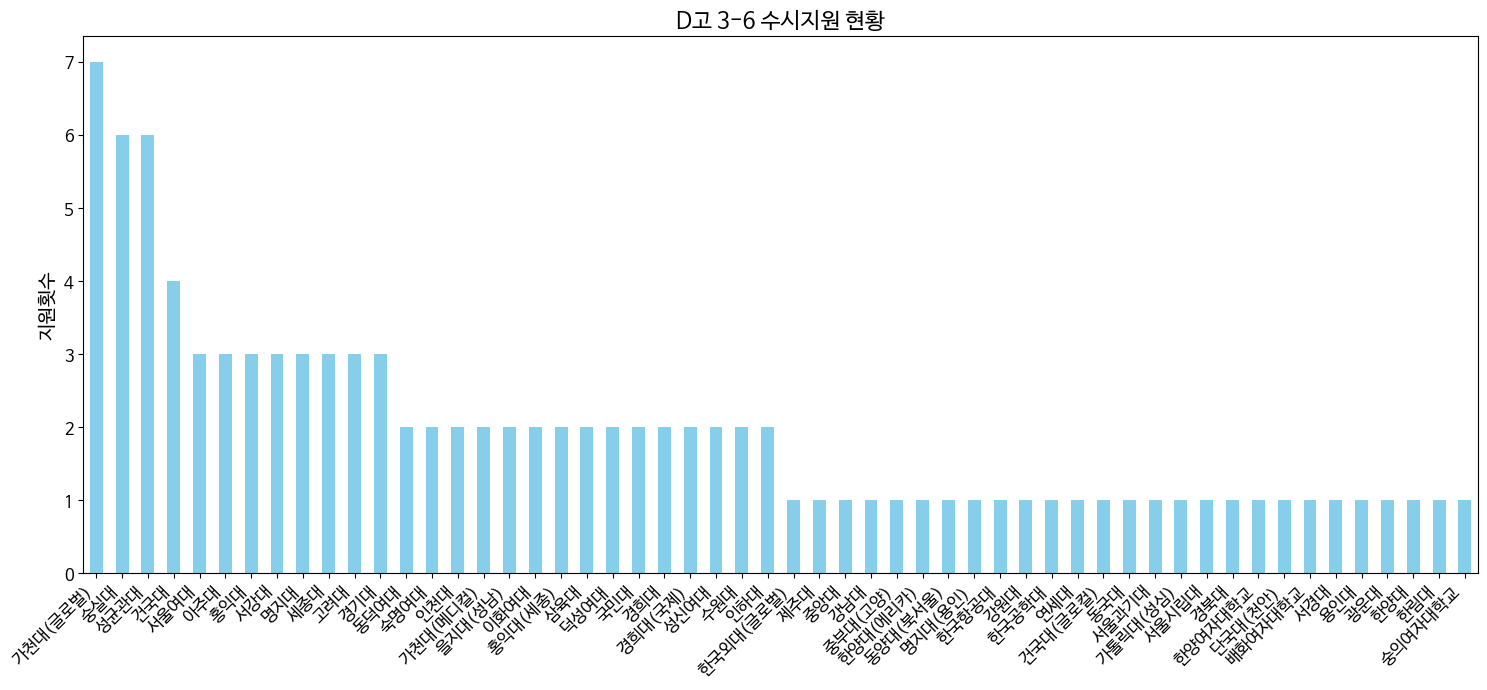

In [ ]:
#수시 지원자수 그래프

import matplotlib.pyplot as plt

# '대학' 열에 대해 빈도를 계산
college_counts = df['대학'].value_counts()

# 빈도 막대 그래프 그리기
plt.figure(figsize=(15, 7))
college_counts.plot(kind='bar', color='skyblue')

plt.title('D고 3-6 수시지원 현황', fontsize=16)
#plt.xlabel('대학명', fontsize=14)
plt.ylabel('지원횟수', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 그래프를 보여줌
plt.show()


In [ ]:
#nsmallest()명령어를 사용하기 위한 모듈 - - 방법1
import heapq

# 입력값
df_name = input("이름: ")

# 데이터프레임 검증 및 학생의 '전과목' 점수 추출
if name in df['이름'].values:
    student_score = df[df['이름'] == df_name]['전과목'].iloc[0]

    # 입력된 학생의 점수보다 높지만, 그 중 가장 낮은 '전과목' 점수를 가진 학생 찾기
    next_best_student = df[(df['전과목'] > student_score)].nsmallest(1, '전과목')

    # 해당 학생의 이름과 '전과목' 점수
    next_best_student_info = next_best_student[['이름', '전과목']].drop_duplicates()
    print(f"{df_name} 학생의 다음 등수 학생: {next_best_student_info}")
else:
    print("입력하신 이름의 학생이 데이터베이스에 존재하지 않습니다.")

In [ ]:
##6반 학생명단을 가명으로 바꾸기

#random라이브러리 불러오기
import random


# 한글 이름을 구성하는 음절 리스트
korean_syllables = [
    '가', '나', '다', '라', '마', '바', '사', '아', '자', '차',
    '카', '타', '파', '하', '건', '현', '수', '영', '우', '미',
    '시', '은', '정', '훈', '진', '승', '민', '태', '선', '리'
]

# 학생들의 성과 이름 분리
students_split_names = df['이름'].str.extract('(?P<last_name>.)(?P<first_name>.+)', expand=True)

# 새로운 이름 생성
new_names = []
for _, row in students_split_names.iterrows():
    # 성은 그대로 유지
    last_name = row['last_name']

    # 이름 부분은 랜덤 음절로 교체 (2음절 이름 가정)
    first_name = ''.join(random.sample(korean_syllables, 2))  # 중복 없이 두 개의 음절 선택

    # 새로운 전체 이름
    new_name = last_name + first_name
    new_names.append(new_name)

# 새로운 이름으로 데이터프레임 업데이트
df['가명'] = new_names

# 엑셀 파일로 저장하기 전에 확인
df.tail()  # 상위 5개 항목 보기


In [ ]:
#남자이름인지 여자이름인지 맞추기


# 남성과 여성 이름에서 자주 사용되는 음절 정의
male_syllables = ['철', '용', '관', '준', '홍', '민', '재', '우', '혁', '남', '건', '영', '규', '진', '성', '훈', '승', '돈', '원', '룡', '환', '찬']
female_syllables = ['지', '희', '영', '미', '은', '선', '연', '수', '아', '나', '라', '예', '서', '윤', '혜', '진', '리', '소', '효', '란', '민', '영', '도']


# 모든 학생들의 이름을 가져온다.
all_students_names = df['이름']

# 모든 학생들의 이름에 대해 성별 추정
all_gender_prediction = []

for full_name in all_students_names:
    # 성을 제외한 이름 부분 추출 (성의 위치는 항상 첫 글자라고 가정)
    first_name = full_name[1:]

    # 이름의 각 음절이 남성 또는 여성 음절 집합에 속하는지 확인
    male_count = sum(syllable in male_syllables for syllable in first_name)
    female_count = sum(syllable in female_syllables for syllable in first_name)

    # 성별 추정: 더 높은 일치 항목 수를 기준으로
    if male_count > female_count:
        gender = '남성'
    elif male_count < female_count:
        gender = '여성'
    else:
        gender = '중성'  # 남성과 여성 음절의 수가 동일하거나, 해당되지 않는 경우

    all_gender_prediction.append(gender)

# 성별 예측 결과를 포함하여 새로운 데이터프레임 생성
all_students_with_gender = df.copy()
all_students_with_gender['예상 성별'] = all_gender_prediction

all_students_with_gender = all_students_with_gender.drop_duplicates(subset=['이름'])

# 예측 결과 확인 (상위 5개 데이터만 출력)
#all_students_with_gender[["학번", "이름", "예상 성별"]].head()
print(all_students_with_gender[["학번", "이름", "예상 성별"]])

In [ ]:
#susiapply.csv파일과 applynum.csv파일을 합기기: 이름, 대학을 기준으로 inner-join명령어를 사용하여 두개파일을 병합(merge)

import pandas as pd

# 데이터 파일 로드
susiapply_df = pd.read_csv('/mnt/data/susiapply.csv')
applynum_df = pd.read_csv('/mnt/data/applynum.csv')


# 'CP949' 인코딩으로 파일 로드 시도
try:
    susiapply_df = pd.read_csv('/mnt/data/susiapply.csv', encoding='CP949')
    applynum_df = pd.read_csv('/mnt/data/applynum.csv', encoding='CP949')
except Exception as e:
    error_message = str(e)
    susiapply_df, applynum_df = None, None

(susiapply_df.head() if susiapply_df is not None else error_message,
 applynum_df.head() if applynum_df is not None else error_message)


# '이름'과 '대학'을 기준으로 두 데이터프레임 병합
merged_df = pd.merge(susiapply_df, applynum_df, on=['이름', '대학'], how='inner')

# 병합 결과를 새 CSV 파일로 저장
output_file_path = '/mnt/data/merged_data.csv'
merged_df.to_csv(output_file_path, index=False, encoding='CP949')  # 한글을 포함하므로 'CP949' 인코딩 사용

output_file_path  # 파일 경로를 출력하여 사용자에게 알려줍니다.


In [ ]:
#대학에 ()가 들어있는 학생, 대학을 출력


import pandas as pd
from tabulate import tabulate  # tabulate를 사용하려면 이 모듈을 import해야 합니다.

# 데이터 프레임 'df'가 이미 존재한다고 가정합니다. 예를 들어, 어떤 파일에서 읽어온 데이터일 수 있습니다.
# df = pd.read_csv('your_data.csv') 또는 다른 방법으로 데이터를 로드할 수 있습니다.

# '대학' 열에서 괄호 '()'가 포함된 행을 필터링합니다.
df_filtered = df[df['대학'].str.contains('\(')]  # 정규 표현식을 사용하여 괄호가 포함된 문자열을 찾습니다.

# 필터링된 데이터에서 '이름'과 '대학' 열만 선택합니다.
df_names_universities = df_filtered[['이름', '대학', '모집단위']]

# 테이블 헤더를 정의합니다.
table_headers = ['이름', '대학', '모집단위']

# tabulate를 사용하여 형식화된 테이블을 만듭니다.
table_string = tabulate(df_names_universities, headers=table_headers, tablefmt='plain')

print("**********************************************")
print(table_string)


In [ ]:
# heapq.nsmallest()명령어 연습

import heapq

# 리스트 예시
numbers = [34, 12, 25, 48, 7, 19, 1, 46, 28, 33]

# numbers 리스트에서 3개의 가장 작은 요소 찾기
smallest_numbers = heapq.nsmallest(4, numbers)

print(smallest_numbers)